In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
# Create directory, manually upload the data
# !mkdir gdrive/MyDrive/financial_data_mining

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest 

## Scikit learn example

In [5]:
bankruptcy_data = pd.read_csv('gdrive/MyDrive/financial_data_mining/bankruptcy.csv', header = 0)

In [6]:
bankruptcy_data.head()

,Firm,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
0,o1,6762,7.5364,0.1545,0.6233,0.6233,1.5489,0.7356,0.3422,96,74,0,0,0
1,o2,16149,-1.0712,0.0271,1.2218,1.2218,0.6236,0.3153,-0.4599,287,29,0,1,0
2,o3,8086,15.2024,0.6163,0.3307,0.3307,2.3553,1.7513,0.4482,64,51,0,1,0
3,o4,7646,31.2239,0.6312,0.5205,0.4829,1.6397,1.4935,0.3089,286,25,0,0,0
4,o5,36067,10.9613,0.3540,0.3786,0.3786,1.5852,1.1626,0.2216,301,33,0,1,0


In [7]:
bankruptcy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Firm    60 non-null     object 
 1   SALES   60 non-null     int64  
 2   ROCE    60 non-null     float64
 3   FFTL    60 non-null     float64
 4   GEAR    60 non-null     float64
 5   CLTA    60 non-null     float64
 6   CACL    60 non-null     float64
 7   QACL    60 non-null     float64
 8   WCTA    60 non-null     float64
 9   LAG     60 non-null     int64  
 10  AGE     60 non-null     int64  
 11  CHAUD   60 non-null     int64  
 12  BIG6    60 non-null     int64  
 13  FAIL    60 non-null     int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 6.7+ KB


In [8]:
bankruptcy_data.groupby(['FAIL'])[['FAIL']].count()

,FAIL
FAIL,
0,30
1,30


In [9]:
bankruptcy_data.describe()

,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,15340.733333,0.892990,0.134183,0.783590,0.615423,1.222795,0.858393,0.040293,241.383333,26.283333,0.216667,0.516667,0.500000
std,20299.682971,13.077896,0.185466,0.434347,0.257975,0.593600,0.492965,0.232599,83.301798,21.886527,0.415450,0.503939,0.504219
min,2857.000000,-37.350000,-0.328300,0.121200,0.121200,0.497400,0.284700,-0.747000,55.000000,2.000000,0.000000,0.000000,0.000000
25%,4016.250000,-5.593675,0.026550,0.592350,0.448650,0.836475,0.517975,-0.099975,182.000000,10.750000,0.000000,0.000000,0.000000
50%,7299.500000,0.788550,0.102100,0.742800,0.621550,1.153000,0.731950,0.083700,266.500000,23.000000,0.000000,1.000000,0.500000
75%,16876.500000,7.653850,0.215725,0.864975,0.741825,1.400725,1.162950,0.208125,301.000000,33.000000,0.000000,1.000000,1.000000
max,103541.000000,33.845100,0.631200,3.533600,1.486500,4.446500,3.363500,0.448200,421.000000,90.000000,1.000000,1.000000,1.000000


In [10]:
x = bankruptcy_data[bankruptcy_data.columns.difference(['Firm', 'FAIL'])]

In [11]:
y = bankruptcy_data[['FAIL']].values.ravel()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [13]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
prep = SelectKBest(k=12)
x_train = prep.fit_transform(x_train, y_train)
x_test = prep.fit_transform(x_test, y_test)

## Scratch example

In [16]:
x_train.shape, y_train.shape

((48, 12), (48,))

In [58]:
x_train[0]

array([-0.45736917, -1.04257207, -0.12353005,  1.94935887,  0.39827489,
        0.31063278, -0.17476942, -0.88244521, -0.61259516,  0.2483411 ,
       -0.647021  ,  0.31215991])

In [17]:
weights = np.random.rand(1,12)
weights2 = weights.reshape((12,1))
bias = np.array([1])

In [18]:
h = (x_train * weights).sum(axis=1) + bias
h

array([-0.31940663,  3.00154023,  1.09920589, -0.15379682, -0.44490423,
        0.24848764,  1.04771456,  0.02587674, -1.004585  , -0.04054288,
        0.01128386, -0.83353009,  1.14291403,  0.67766529, -1.06885817,
        4.16781012,  1.29500659, -0.25567489,  6.53855112,  0.77958688,
       -2.32538146, -0.5705701 ,  0.36499441,  3.12850023, -0.75316565,
        2.74283826,  2.95600391,  0.63717612,  1.94790848,  0.33629609,
        0.49810731,  0.52008293,  0.96919002,  3.25945098,  4.18774498,
        2.66139405,  1.24053406, -0.71660277,  1.10595718,  2.49965618,
        2.43034685,  0.42682414,  0.68393091,  3.35254134, -0.54760747,
       -1.11861694,  3.21282305, -1.04470132])

In [19]:
(x_train @ weights2) + bias

array([[-0.31940663],
       [ 3.00154023],
       [ 1.09920589],
       [-0.15379682],
       [-0.44490423],
       [ 0.24848764],
       [ 1.04771456],
       [ 0.02587674],
       [-1.004585  ],
       [-0.04054288],
       [ 0.01128386],
       [-0.83353009],
       [ 1.14291403],
       [ 0.67766529],
       [-1.06885817],
       [ 4.16781012],
       [ 1.29500659],
       [-0.25567489],
       [ 6.53855112],
       [ 0.77958688],
       [-2.32538146],
       [-0.5705701 ],
       [ 0.36499441],
       [ 3.12850023],
       [-0.75316565],
       [ 2.74283826],
       [ 2.95600391],
       [ 0.63717612],
       [ 1.94790848],
       [ 0.33629609],
       [ 0.49810731],
       [ 0.52008293],
       [ 0.96919002],
       [ 3.25945098],
       [ 4.18774498],
       [ 2.66139405],
       [ 1.24053406],
       [-0.71660277],
       [ 1.10595718],
       [ 2.49965618],
       [ 2.43034685],
       [ 0.42682414],
       [ 0.68393091],
       [ 3.35254134],
       [-0.54760747],
       [-1

In [20]:
np.hstack((x_train, np.ones((48, 1))))[0]

array([-0.45736917, -1.04257207, -0.12353005,  1.94935887,  0.39827489,
        0.31063278, -0.17476942, -0.88244521, -0.61259516,  0.2483411 ,
       -0.647021  ,  0.31215991,  1.        ])

In [21]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [22]:
h = sigmoid(h)
h

array([0.42082036, 0.95264366, 0.75011128, 0.4616264 , 0.39057301,
       0.56180422, 0.74033579, 0.50646882, 0.26804091, 0.48986567,
       0.50282094, 0.30289917, 0.75821426, 0.66321741, 0.25562029,
       0.98475003, 0.7849934 , 0.43642721, 0.99855551, 0.68559107,
       0.08904258, 0.36110529, 0.5902489 , 0.95805316, 0.32013191,
       0.9395076 , 0.95054648, 0.65411484, 0.8752184 , 0.58329052,
       0.62201444, 0.62716716, 0.72495802, 0.96301124, 0.98504652,
       0.93470979, 0.77565696, 0.32814151, 0.75137464, 0.92411771,
       0.91911232, 0.60511505, 0.66461547, 0.96618796, 0.36641967,
       0.24626792, 0.96131399, 0.26024389])

In [23]:
(-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).sum()

61.316433065096334

In [24]:
(-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).sum() + 0.005 * (weights**2).sum()

61.33042514749182

In [25]:
((-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).sum() + 0.005 * (weights**2).sum()) / y_train.size

1.2777171905727462

In [26]:
c = ((-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).sum() + 0.005 * (weights**2).sum()) / y_train.size

In [27]:
h.shape, y_train.shape

((48,), (48,))

In [28]:
(h - y_train).shape, weights.shape

((48,), (1, 12))

In [29]:
((h-y_train)[:, None]*x_train).shape

(48, 12)

In [30]:
g = ((h - y_train)[:, None] * x_train)
g.sum(0)[:-1][None, :] + weights[:, :-1]

array([[  5.45970396,  10.61411464,  15.15213095,  -1.73913159,
        -12.63182989,  10.49078533,  -0.40170576,  -1.90724124,
         16.13434368,   7.85277075,   8.34513331]])

In [31]:
g.sum(0)[None, :].shape, weights.shape

((1, 12), (1, 12))

In [32]:
weights[:, :-1].shape

(1, 11)

In [33]:
def predict(x, theta):
  h = (x * theta).sum(axis=1)
  h = sigmoid(h)
  return h

In [69]:
def cost(x, y, theta, lambdad = 0.1):
  h = predict(x, theta)
  j = (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum()
  regularization = (lambdad / 2) * (theta**2).sum()
  j = (j + regularization) / len(x)
  return j

In [65]:
%timeit len(x_train)

The slowest run took 39.98 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 83.6 ns per loop


In [66]:
%timeit x_train.shape[0]

The slowest run took 122.21 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 248 ns per loop


In [60]:
m, n = x_train.shape
x = np.hstack((x_train, np.ones((m, 1))))
theta = np.random.rand(1, n + 1)

In [68]:
cost(x, y_train, theta)

h:  [0.40869794 0.92000824 0.32019943 0.51236062 0.09268004 0.59552399
 0.57778401 0.79517387 0.04319302 0.31284489 0.15969336 0.14336363
 0.59091804 0.55267719 0.12089934 0.88677182 0.49850642 0.11935125
 0.99962236 0.4993341  0.05152575 0.07385977 0.731214   0.80062344
 0.19507795 0.92250008 0.73772467 0.22604955 0.51410959 0.2541625
 0.56016147 0.43245912 0.84419601 0.90318028 0.63370237 0.9416538
 0.88684742 0.06393955 0.9462129  0.74977942 0.49628687 0.3233034
 0.41767285 0.98276537 0.86929311 0.44935634 0.9380519  0.22451447]


1.4149215543283882

In [96]:
def optimize(x, y, maxrun,lambdad = 0.1, alpha=0.01):
  m, n = x.shape
  x = np.hstack((x, np.ones((m, 1))))
  theta = np.random.rand(1, n + 1)
  costs = []
  
  for i in range(maxrun):
    c = cost(x, y, theta, lambdad)
    costs.append(c)
    gradient = ((predict(x, theta) - y)[:, None] * x).sum(0)[None, :]
    # gradient[:, :-1] = gradient[:, :-1] + lambdad * theta[:, :-1]

    gradient = gradient + lambdad * theta

    gradient = gradient / m
    theta = theta - alpha * gradient
    if i == 0:
      print('theta: ', theta)
    if i % 100 == 0 or i == 999:
      print(str(i) + ') loss: ' + str(c))


  return theta, costs

In [97]:
weights, loss = optimize(x_train, y_train, maxrun = 1000, lambdad = 0.3, alpha = 0.005)

theta:  [[0.99602482 0.98394353 0.39407912 0.72141469 0.23931057 0.94578338
  0.19751929 0.74917235 0.229836   0.96459006 0.18205194 0.13032429
  0.56670311]]
0) loss: 1.5632243476235477
100) loss: 1.2537416483481987
200) loss: 1.0391761667805042
300) loss: 0.907696395341961
400) loss: 0.8264821609168158
500) loss: 0.772058122143918
600) loss: 0.7324438341617022
700) loss: 0.7016821329102437
800) loss: 0.6766728913794635
900) loss: 0.6556817443898726
999) loss: 0.6378315888330307


In [74]:
pred = predict(np.hstack((x_test, np.ones((y_test.size, 1)))), weights)

In [75]:
1 - (np.abs((pred >= 0.5) - y_test)).sum() / y_test.size

0.9166666666666666

In [76]:
loss = np.array(loss)
loss.shape

(1000,)

In [77]:
loss = np.hstack((np.array(range(1000))[:, None], loss[:, None]))
loss.shape

(1000, 2)

In [78]:
#plot cost function
%matplotlib inline

Text(0.5, 1.0, 'Cost Function')

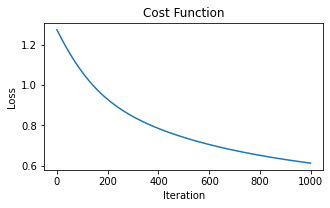

In [79]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(loss[:, 0], loss[:, 1], label='Cost')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.set_title('Cost Function')